In [6]:
from sklearn.datasets import load_boston, load_diabetes, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz

from IPython.display import Image
from six import StringIO

import pydotplus
import pandas as pd
import numpy as np
import mglearn
import math

import seaborn as sns
#settings
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, "savefig.dpi":300})
sns.set_context("notebook")

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi']=70
plt.rcParams['savefig.dpi']=300

In [7]:
refer = pd.read_csv('reference.csv')

In [8]:
final0 = pd.read_csv('Final.csv')
final0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516407 entries, 0 to 516406
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            516407 non-null  int64  
 1   dcterms_creator       516407 non-null  float64
 2   degree                516407 non-null  int64  
 3   betweenness           516407 non-null  float64
 4   eigenvector           516407 non-null  float64
 5   close                 516407 non-null  float64
 6   Pair                  516407 non-null  object 
 7   Collab_Num            516407 non-null  int64  
 8   Num_Unique_CoAuthors  516407 non-null  int64  
 9   new                   516407 non-null  object 
 10  coauth                516407 non-null  float64
 11  citationCount_P       516407 non-null  int64  
 12  fos_list              516407 non-null  object 
 13  rank_A                516407 non-null  float64
 14  paperCount_A          516407 non-null  float64
 15  

In [9]:
final = pd.merge(final0,refer,how='left',left_on='dcterms_creator',right_on='dcterms_creator')
final.head()

,Unnamed: 0,dcterms_creator,degree,betweenness,eigenvector,close,Pair,Collab_Num,Num_Unique_CoAuthors,new,coauth,citationCount_P,fos_list,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P,referenceCount_P
0,0,2.421977e+09,16,6.343791e-08,4.010697e-11,0.000243,"(2421977158.0, 2688546657.0)",3,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.688547e+09,1,Geology,21075.0,787.0,21024.0,10,26.714104,23
1,1,2.421977e+09,16,6.343791e-08,4.010697e-11,0.000243,"(2421977158.0, 2688546657.0)",3,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.688547e+09,2,Geology,21075.0,787.0,21024.0,6,26.714104,23
2,2,2.421977e+09,16,6.343791e-08,4.010697e-11,0.000243,"(2421977158.0, 2688546657.0)",3,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.688547e+09,23,Geology,21075.0,787.0,21024.0,3,26.714104,23
3,3,2.421977e+09,16,6.343791e-08,4.010697e-11,0.000243,"(2421977158.0, 2146190049.0)",3,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.146190e+09,1,Geology,21075.0,787.0,21024.0,10,26.714104,23
4,4,2.421977e+09,16,6.343791e-08,4.010697e-11,0.000243,"(2421977158.0, 2146190049.0)",3,16,"(2429004576.0, 2146190049.0, 2568163170.0, 268...",2.146190e+09,2,Geology,21075.0,787.0,21024.0,6,26.714104,23


In [10]:
data = final[final.columns[[3,4,5,8,13,14,15,17,18]]]
#
data = data[data.rank_A <21075]
data.head()

,betweenness,eigenvector,close,Num_Unique_CoAuthors,rank_A,paperCount_A,citationCount_A,Cite_per_P,referenceCount_P
79,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
80,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
81,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
82,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
83,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14


# EDA

In [11]:
data.head()

,betweenness,eigenvector,close,Num_Unique_CoAuthors,rank_A,paperCount_A,citationCount_A,Cite_per_P,referenceCount_P
79,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
80,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
81,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
82,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
83,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14


A̲u̲t̲h̲o̲r̲_̲R̲a̲n̲k̲_̲C̲o̲r̲r̲e̲l̲a̲t̲i̲o̲n̲s


betweenness             0.040615
eigenvector            -0.052977
close                  -0.030472
Num_Unique_CoAuthors   -0.046171
rank_A                  1.000000
paperCount_A            0.025924
citationCount_A        -0.007920
Cite_per_P             -0.174996
referenceCount_P       -0.060603
Name: rank_A, dtype: float64

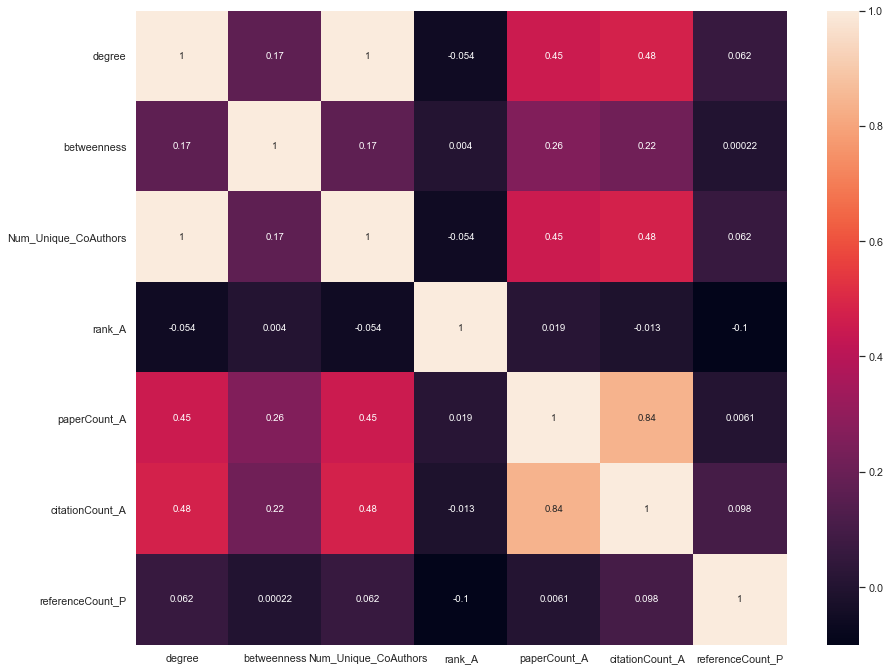

In [12]:
plt.figure(figsize=(15, 12))
datacorr = final[final.columns[[2,3,8,13,14,15,18]]]
sns.heatmap(datacorr.corr(), annot=True);
print("\u0332".join("Author_Rank_Correlations"))
data.corr()['rank_A']

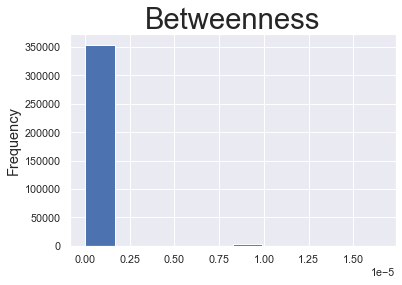

In [13]:
data.hist('betweenness');
plt.title("Betweenness", fontsize=30);
plt.ylabel('Frequency',fontsize=15);

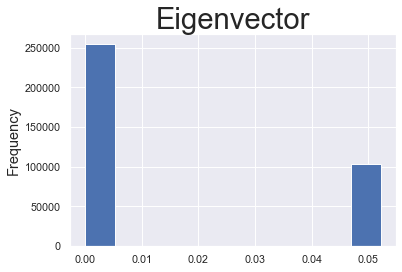

In [14]:
data.hist('eigenvector');
plt.title("Eigenvector", fontsize=30);
plt.ylabel('Frequency',fontsize=15);

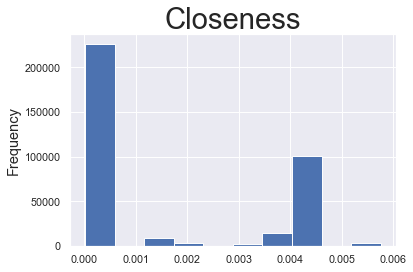

In [15]:
data.hist('close');
plt.title("Closeness", fontsize=30);
plt.ylabel('Frequency',fontsize=15);

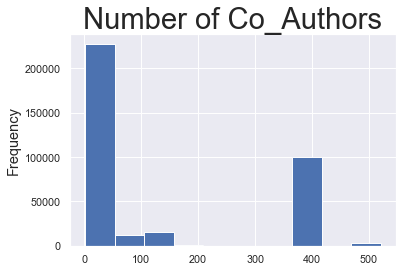

In [16]:
data.hist('Num_Unique_CoAuthors');
plt.title("Number of Co_Authors", fontsize=30);
plt.ylabel('Frequency',fontsize=15);

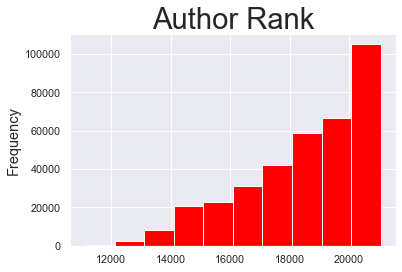

In [17]:
data.hist('rank_A',color='red');
plt.title("Author Rank", fontsize=30);
plt.ylabel('Frequency',fontsize=15);

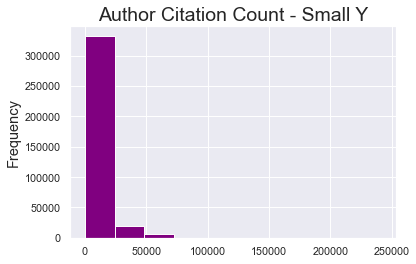

In [18]:
data.hist('citationCount_A',color='purple');
plt.title("Author Citation Count - Small Y", fontsize=20);
#plt.ylim(0,1000)
plt.ylabel('Frequency',fontsize=15);

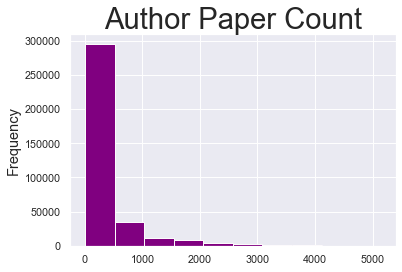

In [19]:
data.hist('paperCount_A',color='purple');
plt.title("Author Paper Count", fontsize=30);
plt.ylabel('Frequency',fontsize=15);

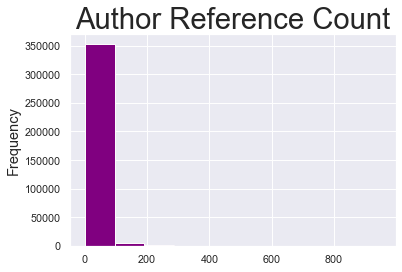

In [20]:
data.hist('referenceCount_P',color='purple');   #,bins=1000);
plt.title("Author Reference Count", fontsize=30);
#plt.ylim(0,1000);
#plt.xlim(0,50);

plt.ylabel('Frequency',fontsize=15);

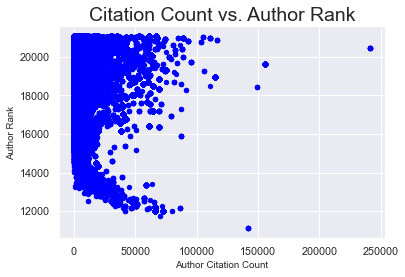

In [21]:
data.plot.scatter(x = 'citationCount_A', y = 'rank_A',c='blue'); #, s = 'Num_Unique_CoAuthors'
plt.title("Citation Count vs. Author Rank", fontsize=20);
plt.xlabel('Author Citation Count',fontsize=10);
plt.ylabel('Author Rank',fontsize=10);

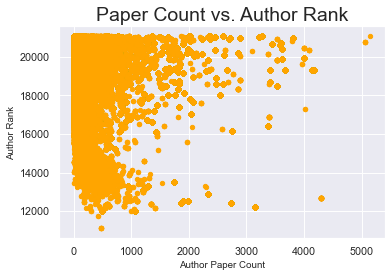

In [22]:
data.plot.scatter(x = 'paperCount_A', y = 'rank_A',c='orange');
plt.title("Paper Count vs. Author Rank", fontsize=20);
plt.xlabel('Author Paper Count',fontsize=10);
plt.ylabel('Author Rank',fontsize=10);

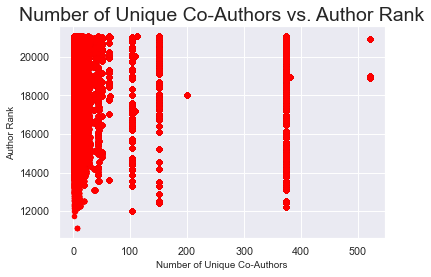

In [23]:
data.plot.scatter(x = 'Num_Unique_CoAuthors', y = 'rank_A',c='red');
plt.title("Number of Unique Co-Authors vs. Author Rank", fontsize=20);
plt.xlabel('Number of Unique Co-Authors',fontsize=10);
plt.ylabel('Author Rank',fontsize=10);

In [24]:
bins = [0, 14000, 16000, 18000, 20000]
data['Author_Ranks'] = pd.cut(data['rank_A'], bins)
data.Author_Ranks.unique()

[NaN, (18000.0, 20000.0], (16000.0, 18000.0], (14000.0, 16000.0], (0.0, 14000.0]]
Categories (4, interval[int64]): [(0, 14000] < (14000, 16000] < (16000, 18000] < (18000, 20000]]

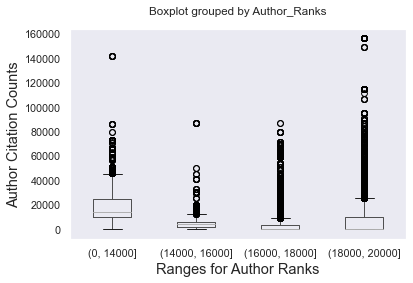

In [25]:
data.boxplot('citationCount_A',by='Author_Ranks',grid=False);
plt.title("", fontsize=30);
plt.xlabel('Ranges for Author Ranks',fontsize=15);
plt.ylabel('Author Citation Counts',fontsize=15);

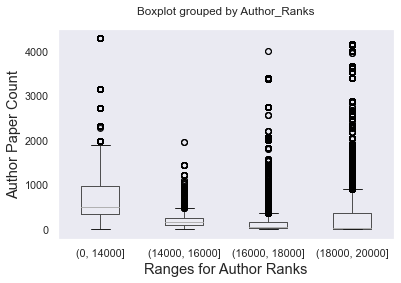

In [26]:
data.boxplot('paperCount_A',by='Author_Ranks',grid=False);
plt.title("", fontsize=30);
plt.xlabel('Ranges for Author Ranks',fontsize=15);
plt.ylabel('Author Paper Count',fontsize=15);

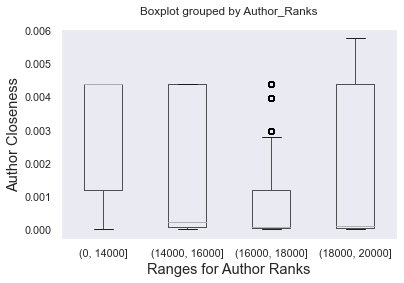

In [27]:
data.boxplot('close',by='Author_Ranks',grid=False);
plt.title("", fontsize=30);
plt.xlabel('Ranges for Author Ranks',fontsize=15);
#plt.ylim(-10,500)
plt.ylabel('Author Closeness',fontsize=15);

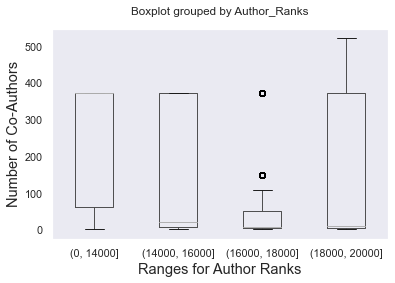

In [28]:
data.boxplot('Num_Unique_CoAuthors',by='Author_Ranks',grid=False);
plt.title("", fontsize=30);
plt.xlabel('Ranges for Author Ranks',fontsize=15);
plt.ylabel('Number of Co-Authors',fontsize=15);

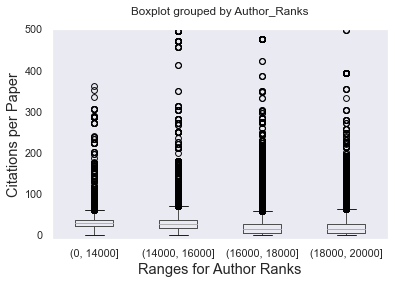

In [29]:
data.boxplot('Cite_per_P',by='Author_Ranks',grid=False);
plt.title("", fontsize=30);
plt.xlabel('Ranges for Author Ranks',fontsize=15);
plt.ylim(-10,500)
plt.ylabel('Citations per Paper',fontsize=15);

# MODEL

In [30]:
data = final[final.columns[[3,4,5,8,13,14,15,17,18]]]
#
data = data[data.rank_A <21075]
data.head()

,betweenness,eigenvector,close,Num_Unique_CoAuthors,rank_A,paperCount_A,citationCount_A,Cite_per_P,referenceCount_P
79,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
80,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
81,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
82,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14
83,8.908302e-09,8.245980e-13,0.000106,9,20623.0,266.0,4648.0,17.473684,14


In [31]:
X = data.drop(['rank_A'], axis=1)
y = data['rank_A']

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['eigenvector','close','betweenness','Num_Unique_CoAuthors','paperCount_A','citationCount_A','referenceCount_P']] = scaler.fit_transform(X[['eigenvector','close','betweenness','Num_Unique_CoAuthors','paperCount_A','citationCount_A','referenceCount_P']])

In [33]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,test_size=0.2,shuffle=True)

In [34]:
from notebook.services.config import ConfigManager
ConfigManager().update('notebook', {'ExecuteTime': {
    'display_absolute_timestamps': False,
    'relative_timing_update_period': 5,
    'template': {
        'executed': 'started ${start_time}, finished in ${duration}',
    }
}})

{'load_extensions': {'spellchecker/main': True,
  'spellchecker': True,
  'spellchecker/': True,
  'autoscroll': True,
  'collapsible_headings': True,
  'codefolding': True,
  'hide_input_all': True},
 'Notebook': {'Toolbar': True},
 'ExecuteTime': {'display_absolute_timestamps': False,
  'relative_timing_update_period': 5,
  'template': {'executed': 'started ${start_time}, finished in ${duration}'}}}

### Linear Regression

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [38]:
pd.DataFrame({"Actual": y_test, "Predict": y_test}).head()

,Actual,Predict
303514,18979.0,18979.0
218517,20355.0,20355.0
265174,19372.0,19372.0
316061,20267.0,20267.0
508202,20325.0,20325.0


In [39]:
from sklearn.metrics import r2_score, mean_squared_error
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))

Linear Regression R2 Score: 0.03629985776644751 
Linear Regression MSE: 4093607.249987674, 
Linear Regression RMSE:2023.2664802214447


C:\Users\Admin\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


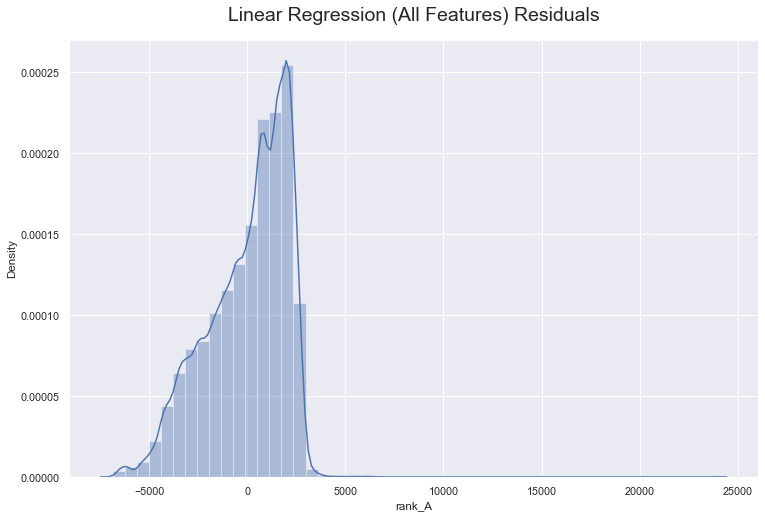

In [40]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.distplot((y_test - y_pred))
plt.title('Linear Regression (All Features) Residuals', fontdict={'fontsize':20}, pad=20)
plt.show()

C:\Users\Admin\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


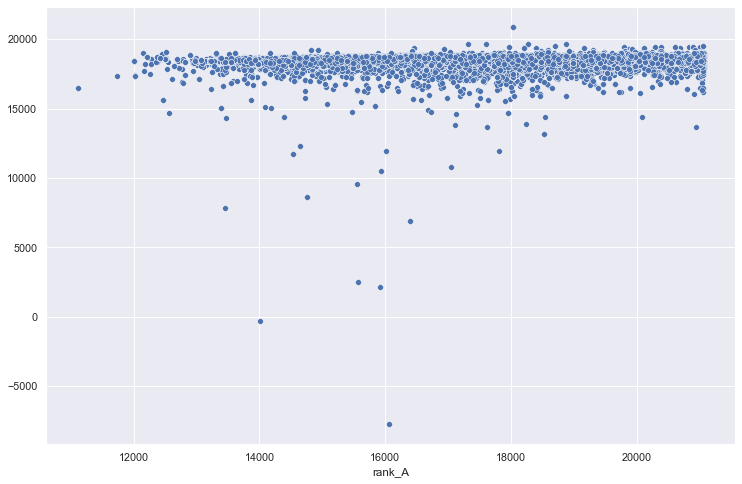

In [41]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
# sns.(y_test, y_pred)
sns.scatterplot(y_test, y_pred)
plt.show()

### Bayesian Ridge

In [42]:
from sklearn import linear_model
br = linear_model.BayesianRidge()
br.fit(X_train, y_train)
y_pred_br = br.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test, y_pred_br))

r_square score:  0.03629990008752759


### Polynomial Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Create linear regression object
poly = PolynomialFeatures(degree=3)

#X_train = poly.fit_transform(X_train)
#X_test = poly.fit_transform(X_test)

#polly = linear_model.LinearRegression()
#polly.fit(X_train, y_train)

#print(polly.score(X_train, y_train))
#print(polly.score(X_test, y_test))
print(0.11209275)

0.11209275


### Random Forest

In [45]:
%%time

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 101)
rfr.fit(X_train,y_train)
y_head_rfr = rfr.predict(X_test)

Wall time: 3min 44s


In [46]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test, y_head_rfr))

r_square score:  0.9575694453406831


### Decision Tree

In [47]:
%%time

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 101)
dtr.fit(X_train,y_train)
y_head_dtr = dtr.predict(X_test)

Wall time: 2.92 s


In [48]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))

r_square score:  0.9451658552359385


# Results

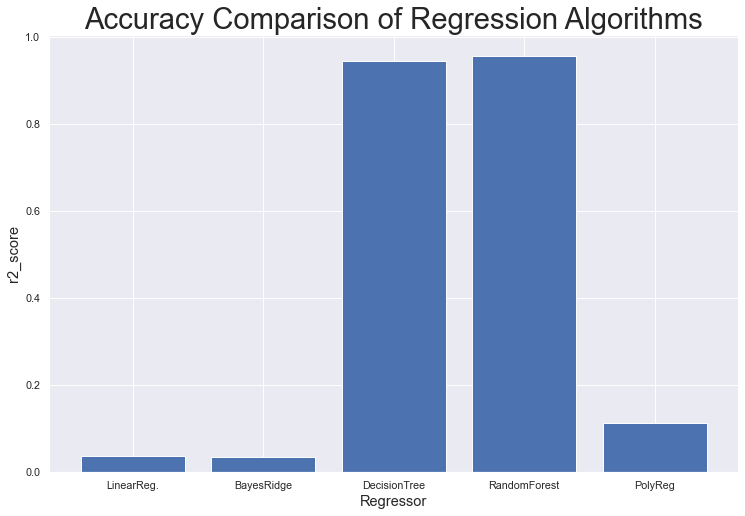

In [49]:
y = np.array([r2_score(y_test,y_pred),0.03511228249145615,r2_score(y_test,y_head_dtr),r2_score(y_test,y_head_rfr),0.11209275])
x = ["LinearReg.","BayesRidge","DecisionTree","RandomForest","PolyReg"]
plt.bar(x,y)
plt.title("Accuracy Comparison of Regression Algorithms",fontsize=30)
plt.xlabel("Regressor",fontsize=15)
plt.ylabel("r2_score",fontsize=15)
plt.show()

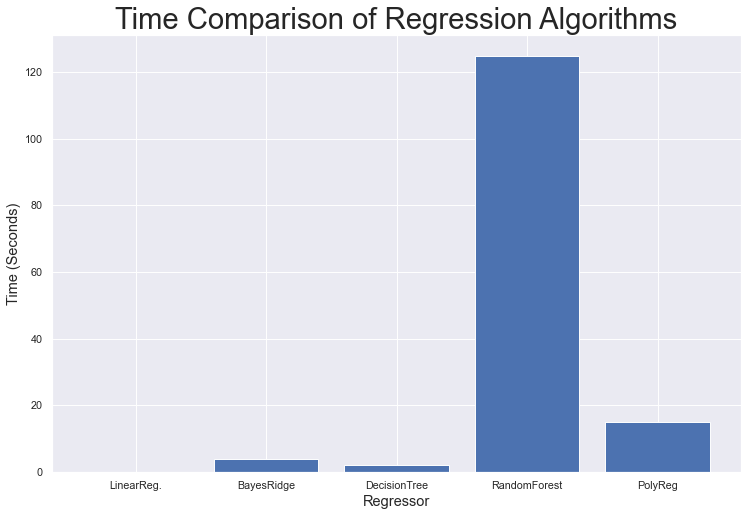

In [50]:
y = np.array([0.05, 4, 2, 125,15])
x = ["LinearReg.","BayesRidge","DecisionTree","RandomForest","PolyReg"]
plt.bar(x,y)
plt.title("Time Comparison of Regression Algorithms",fontsize=30)
plt.xlabel("Regressor",fontsize=15)
plt.ylabel("Time (Seconds)",fontsize=15)
plt.show()

[0.01153483 0.01874718 0.06450441 0.05500572 0.34726778 0.21825023
 0.23115957 0.05353029]


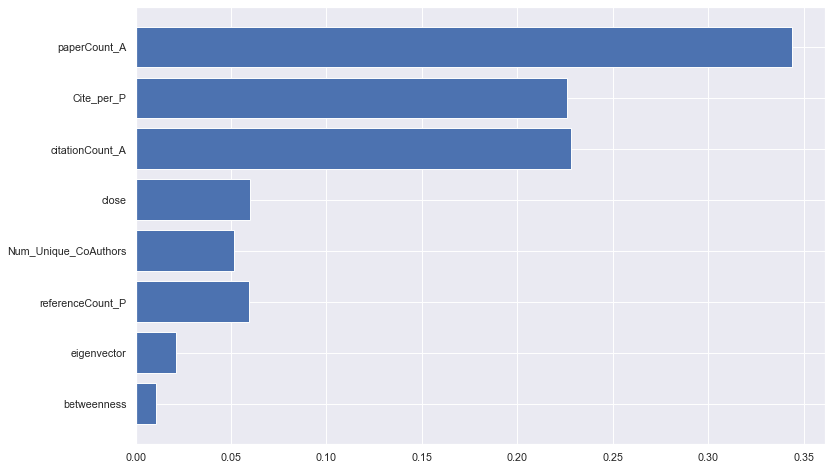

In [51]:
#GINI Importance
print(dtr.feature_importances_)
sorted_idx = dtr.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rfr.feature_importances_[sorted_idx]);

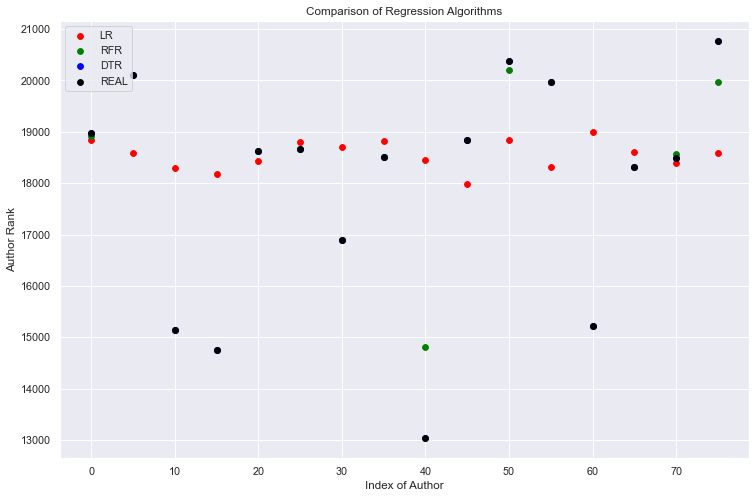

In [59]:
red = plt.scatter(np.arange(0,80,5),y_pred[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Author")
plt.ylabel("Author Rank")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

# Field of Study

In [52]:
def three_reg(data,field, columns):
    X = data.drop(['rank_A'], axis=1)
    y = data['rank_A']
    
    scaler = StandardScaler()
    X[columns] = scaler.fit_transform(X[columns])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    #Linear Regression
    lr_r2 = r2_score(y_test, y_pred)
    lr_mse = mean_squared_error(y_test, y_pred)
    lr_rmse = np.sqrt(lr_mse)
    print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1},\nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))
    
    #Random Forest
    rfr = RandomForestRegressor(n_estimators = 100, random_state = 101)
    rfr.fit(X_train,y_train)
    y_head_rfr = rfr.predict(X_test)
    print("Random Forest r_square score: ", r2_score(y_test, y_head_rfr))
    
    
    
    fos_dict[field] = rfr.feature_importances_
    #Decision Tree
    dtr = DecisionTreeRegressor(random_state = 101)
    dtr.fit(X_train,y_train)
    y_head_dtr = dtr.predict(X_test)
    print(" Decision Tree r_square score: ", r2_score(y_test,y_head_dtr))
    
    print(dtr.feature_importances_)
    sorted_idx = dtr.feature_importances_.argsort()
    #important = plt.barh(X.columns[sorted_idx], dtr.feature_importances_[sorted_idx])
    important = plt.barh(X.columns, dtr.feature_importances_)
    plt.pause(0.01)
    plt.show
    #Comparison
    y = np.array([r2_score(y_test,y_pred),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
    x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
    #plt.bar(x,y)
    #plt.title("Comparison of Regression Algorithms")
    #plt.xlabel("Regressor")
    #plt.ylabel("r2_score")
    #plt.show()

In [53]:
data_fos = final[final.columns[[3,4,5,7,8,12,13,14,15,16,17]]]
data_fos.fos_list.unique()

array(['Geology', 'Environmental science', 'Business', 'History',
       'Economics', 'Computer science', 'Materials science', 'Art',
       'Geography', 'Chemistry', 'Mathematics', 'Biology', 'Sociology',
       'Philosophy', 'Physics', 'Medicine', 'Political science',
       'Engineering', 'Psychology'], dtype=object)

In [54]:
data_fos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516407 entries, 0 to 516406
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   betweenness           516407 non-null  float64
 1   eigenvector           516407 non-null  float64
 2   close                 516407 non-null  float64
 3   Collab_Num            516407 non-null  int64  
 4   Num_Unique_CoAuthors  516407 non-null  int64  
 5   fos_list              516407 non-null  object 
 6   rank_A                516407 non-null  float64
 7   paperCount_A          516407 non-null  float64
 8   citationCount_A       516407 non-null  float64
 9   Paper_Auth_Num        516407 non-null  int64  
 10  Cite_per_P            516407 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 47.3+ MB


In [55]:
for x in data_fos.fos_list.unique():
    print(x)

Geology
Environmental science
Business
History
Economics
Computer science
Materials science
Art
Geography
Chemistry
Mathematics
Biology
Sociology
Philosophy
Physics
Medicine
Political science
Engineering
Psychology


In [56]:
d = dict.fromkeys(['betweenness','eigenvector','close'], ['mean', 'min', 'max'])

fosss = pd.DataFrame(data_fos.groupby("fos_list").agg(d))
fosss    

betweenness                      eigenvector  \
                               mean  min           max          mean   
fos_list                                                               
Art                    3.881684e-11  0.0  1.079794e-08  1.825318e-08   
Biology                4.637991e-10  0.0  1.368639e-07  3.521594e-09   
Business               7.102294e-11  0.0  8.908302e-09  1.014305e-07   
Chemistry              8.857843e-08  0.0  8.979568e-06  4.421762e-02   
Computer science       9.710439e-11  0.0  1.673681e-08  9.138332e-12   
Economics              8.197210e-11  0.0  8.908302e-09  8.240568e-11   
Engineering            2.638096e-11  0.0  2.159588e-09  4.536663e-11   
Environmental science  7.618696e-10  0.0  1.986821e-07  7.380922e-09   
Geography              2.005668e-10  0.0  2.267568e-08  4.777465e-10   
Geology                1.023396e-09  0.0  1.444225e-07  8.011973e-09   
History                3.376038e-10  0.0  2.699485e-08  2.938862e-10   
Materials science      1.308660e-10  0.0  2.159588e-08  1.953660e-10   
Mathematics            3.042888e-07  0.0  1.653381e-05  1.222062e-03   
Medicine               6.533419e-10  0.0  8.260425e-08  6.630132e-06   
Philosophy             6.739308e-11  0.0  1.376738e-08  1.299123e-09   
Physics                5.337779e-07  0.0  1.653381e-05  2.925164e-03   
Political science      6.322479e-10  0.0  4.562130e-08  2.666387e-11   
Psychology             8.067589e-11  0.0  9.718147e-09  1.146486e-11   
Sociology              2.111516e-09  0.0  8.260425e-08  5.741763e-07   

                                                      close            \
                                min           max      mean       min   
fos_list                                                                
Art                    1.202558e-15  1.363460e-07  0.000145  0.000012   
Biology                1.202558e-15  4.820993e-08  0.000099  0.000012   
Business               1.202558e-15  5.795012e-07  0.000149  0.000012   
Chemistry              1.202558e-15  5.218606e-02  0.003815  0.000012   
Computer science       1.202558e-15  9.069562e-11  0.000053  0.000012   
Economics              1.202558e-15  8.839909e-10  0.000063  0.000012   
Engineering            1.202558e-15  4.535443e-10  0.000067  0.000012   
Environmental science  1.202558e-15  1.828420e-07  0.000107  0.000012   
Geography              1.202558e-15  5.804520e-09  0.000088  0.000012   
Geology                1.202558e-15  1.560275e-07  0.000109  0.000012   
History                1.202558e-15  2.781591e-09  0.000094  0.000012   
Materials science      1.202558e-15  7.279621e-09  0.000072  0.000012   
Mathematics            1.202558e-15  5.170435e-02  0.000713  0.000012   
Medicine               1.202558e-15  2.383352e-05  0.000399  0.000012   
Philosophy             1.202558e-15  7.279621e-09  0.000119  0.000012   
Physics                1.202558e-15  5.218606e-02  0.003111  0.000012   
Political science      1.202558e-15  3.601370e-10  0.000062  0.000012   
Psychology             1.202558e-15  9.069562e-11  0.000060  0.000012   
Sociology              1.202558e-15  2.383352e-05  0.000119  0.000012   

                                 
                            max  
fos_list                         
Art                    0.000500  
Biology                0.000418  
Business               0.000639  
Chemistry              0.005757  
Computer science       0.000174  
Economics              0.000209  
Engineering            0.000186  
Environmental science  0.000709  
Geography              0.000290  
Geology                0.000511  
History                0.000337  
Materials science      0.000302  
Mathematics            0.004404  
Medicine               0.001266  
Philosophy             0.000302  
Physics                0.005757  
Political science      0.000302  
Psychology             0.000155  
Sociology              0.001266

Geology
Linear Regression R2 Score: 0.06984615120387283 
Linear Regression MSE: 4105119.3898928734,
Linear Regression RMSE:2026.109421994003
Random Forest r_square score:  0.9267487757326411
 Decision Tree r_square score:  0.9008520074944584
[0.03255488 0.06396641 0.04906087 0.03937801 0.22215302 0.36872265
 0.0277205  0.19644366]


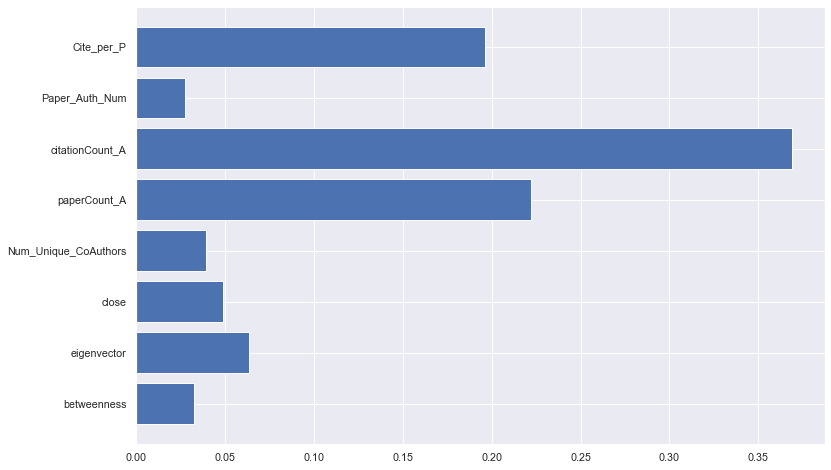





Environmental science
Linear Regression R2 Score: 0.06202380009260677 
Linear Regression MSE: 3060734.637559471,
Linear Regression RMSE:1749.4955380221668
Random Forest r_square score:  0.8973197957223775
 Decision Tree r_square score:  0.8860138649511816
[0.01342468 0.05333822 0.07664918 0.03073601 0.18828792 0.39520989
 0.03754518 0.20480892]


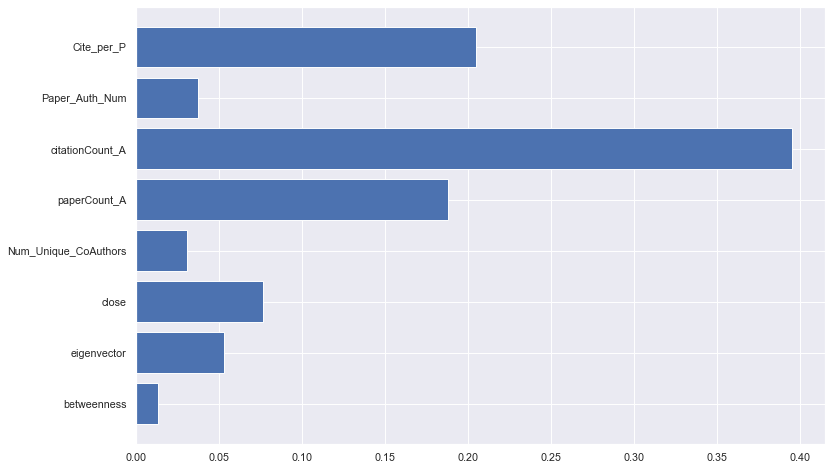





Business
Linear Regression R2 Score: 0.17855841696677666 
Linear Regression MSE: 2941128.897118657,
Linear Regression RMSE:1714.9719814383723
Random Forest r_square score:  0.8202863360289636
 Decision Tree r_square score:  0.7544365252881251
[0.01883132 0.0302619  0.03533707 0.02820366 0.1848261  0.49853795
 0.0332896  0.1707124 ]


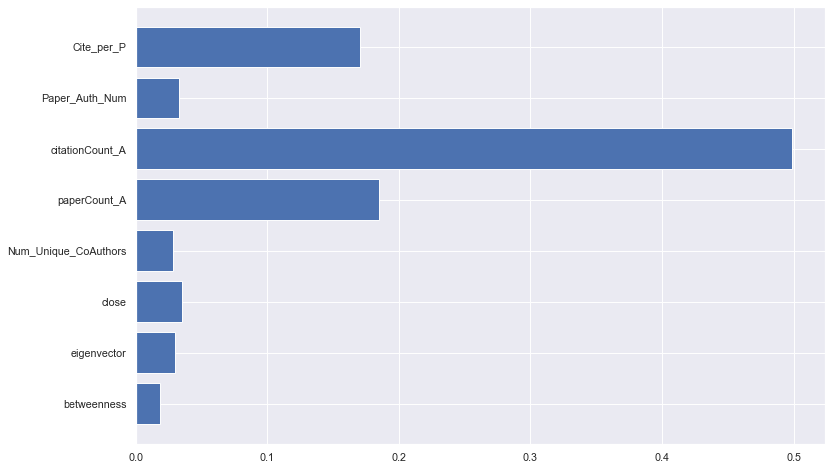





History
Linear Regression R2 Score: 0.06793629082387553 
Linear Regression MSE: 2779496.312838578,
Linear Regression RMSE:1667.1821474687695
Random Forest r_square score:  0.8687859173215791
 Decision Tree r_square score:  0.8128254296598124
[0.01247823 0.07073057 0.05808571 0.01284706 0.20850011 0.37126097
 0.02732344 0.23877391]


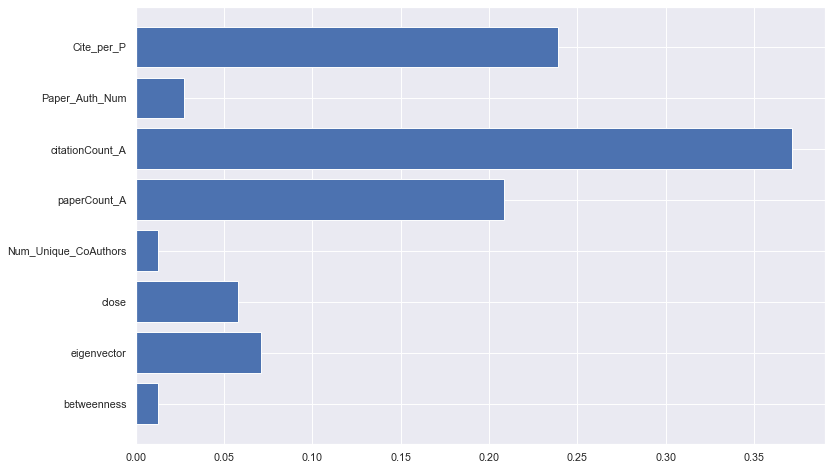





Economics
Linear Regression R2 Score: 0.10938389298493945 
Linear Regression MSE: 3630666.445114481,
Linear Regression RMSE:1905.430776783686
Random Forest r_square score:  0.7654140941634525
 Decision Tree r_square score:  0.7302236227523788
[0.00856862 0.04235842 0.01929216 0.02977805 0.30731466 0.33335469
 0.06171666 0.19761674]


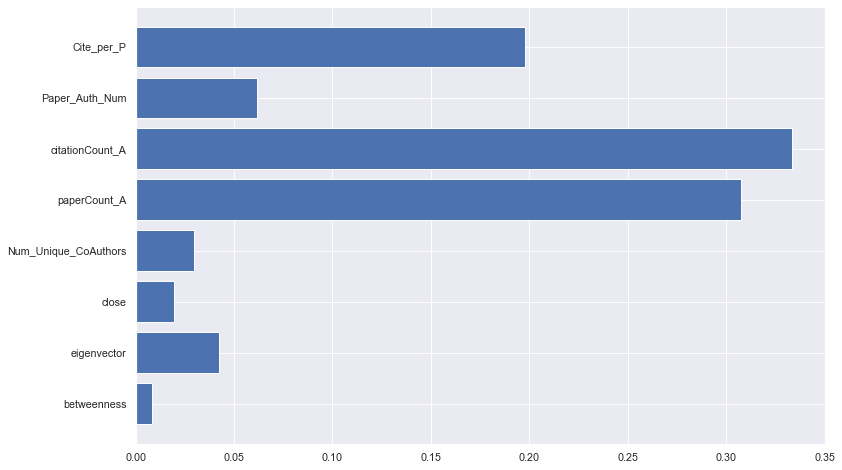





Computer science
Linear Regression R2 Score: 0.05339662987439531 
Linear Regression MSE: 3690543.1578821163,
Linear Regression RMSE:1921.0786443771938
Random Forest r_square score:  0.8010290318371712
 Decision Tree r_square score:  0.7381971807927863
[0.01745747 0.03285842 0.04976879 0.03786785 0.25796358 0.36526412
 0.01998072 0.21883905]


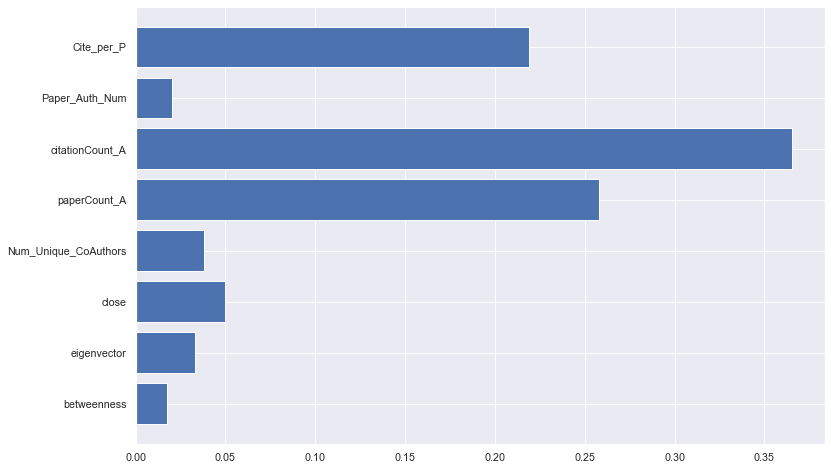





Materials science
Linear Regression R2 Score: 0.04085647514197266 
Linear Regression MSE: 3430807.1006587157,
Linear Regression RMSE:1852.2438016251306
Random Forest r_square score:  0.8942007093403366
 Decision Tree r_square score:  0.859280604394414
[0.00945136 0.04990199 0.05056392 0.03570084 0.19397155 0.36058668
 0.0417007  0.25812296]


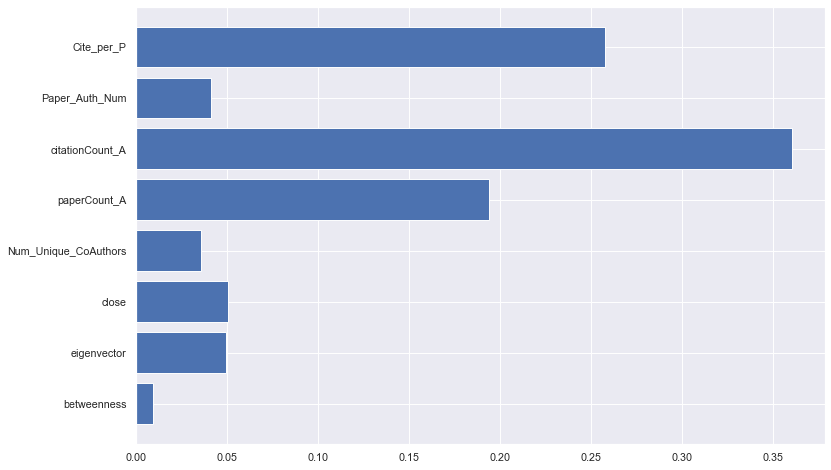





Art
Linear Regression R2 Score: 0.14038328861695892 
Linear Regression MSE: 3074454.806473101,
Linear Regression RMSE:1753.4123321321488
Random Forest r_square score:  0.8862566938849545
 Decision Tree r_square score:  0.8527447197432614
[0.00447171 0.02496731 0.02691681 0.04809524 0.221018   0.41003061
 0.02224299 0.24225733]


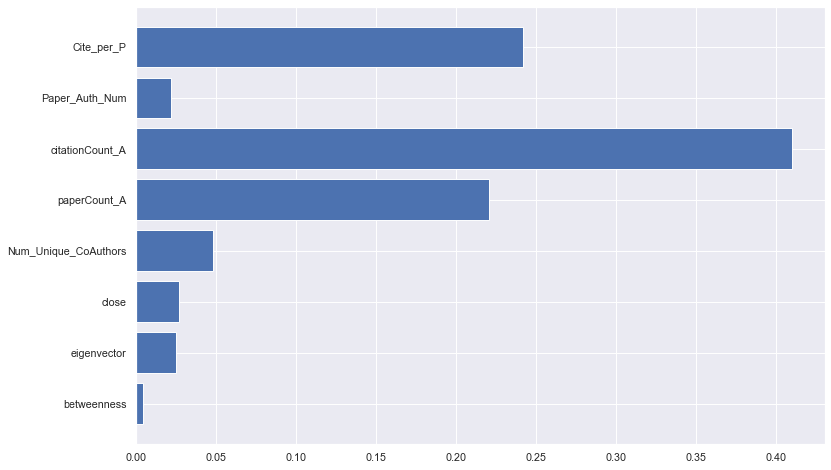





Geography
Linear Regression R2 Score: 0.08824301814851498 
Linear Regression MSE: 3248591.247189922,
Linear Regression RMSE:1802.3848776523625
Random Forest r_square score:  0.8973231467547372
 Decision Tree r_square score:  0.8775708622262747
[0.01770499 0.0435588  0.03511501 0.04209807 0.18211139 0.40244129
 0.03863576 0.2383347 ]


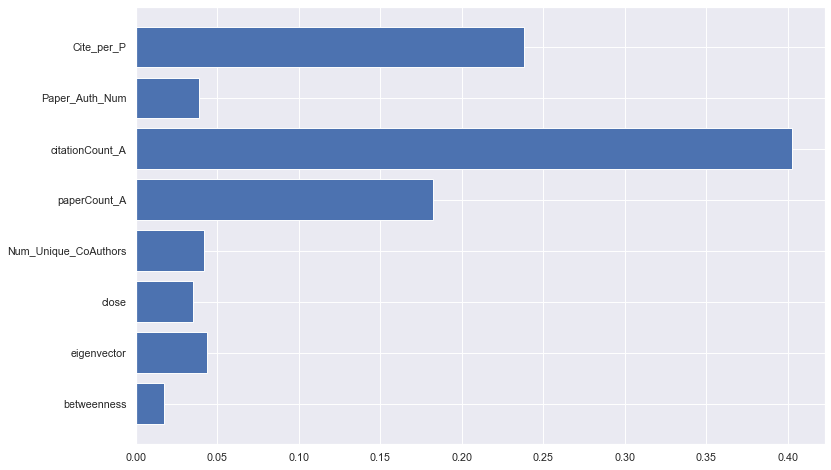





Chemistry
Linear Regression R2 Score: 0.07352111172472209 
Linear Regression MSE: 4881174.051293446,
Linear Regression RMSE:2209.337921480878
Random Forest r_square score:  0.9930080573878862
 Decision Tree r_square score:  0.9917252477296628
[0.00074542 0.00266559 0.01497745 0.0220394  0.29716737 0.3679262
 0.00777436 0.2867042 ]


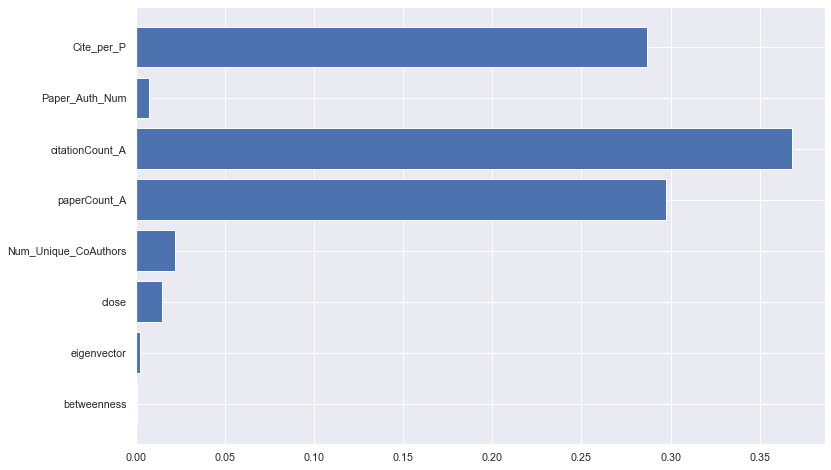





Mathematics
Linear Regression R2 Score: 0.06205618717647776 
Linear Regression MSE: 3385207.588983851,
Linear Regression RMSE:1839.8933634816588
Random Forest r_square score:  0.8243324884420022
 Decision Tree r_square score:  0.7667531147724567
[0.00428556 0.00773916 0.07315977 0.06931275 0.27032234 0.2816679
 0.05557308 0.23793945]


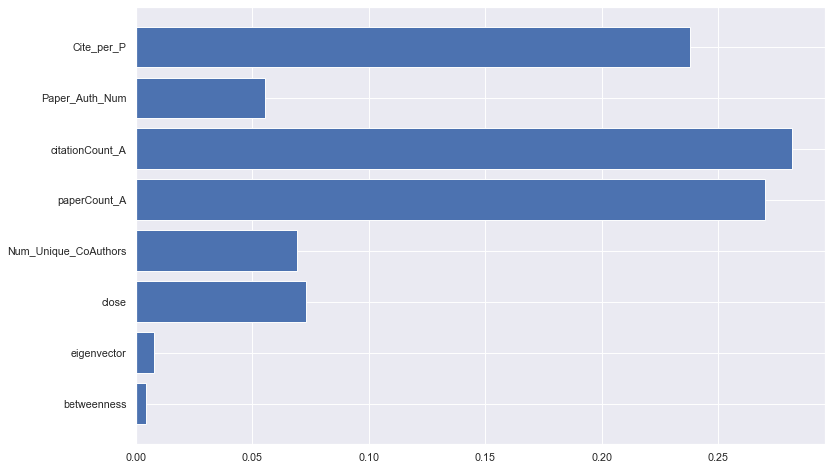





Biology
Linear Regression R2 Score: 0.06508042047533957 
Linear Regression MSE: 3446901.8612753963,
Linear Regression RMSE:1856.5833838735593
Random Forest r_square score:  0.9063396302451016
 Decision Tree r_square score:  0.8882813893293455
[0.00834358 0.04335415 0.02480538 0.03455637 0.24126312 0.34135898
 0.05616455 0.25015387]


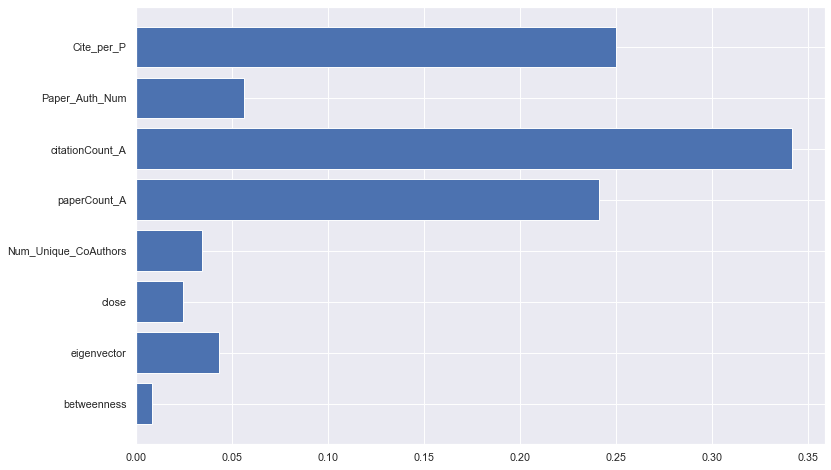





Sociology
Linear Regression R2 Score: 0.04176893190574438 
Linear Regression MSE: 4225564.94755144,
Linear Regression RMSE:2055.617899209734
Random Forest r_square score:  0.8792527419003964
 Decision Tree r_square score:  0.8238950134073455
[0.01447431 0.01243983 0.10337714 0.03799126 0.25719583 0.34504493
 0.03098259 0.19849411]


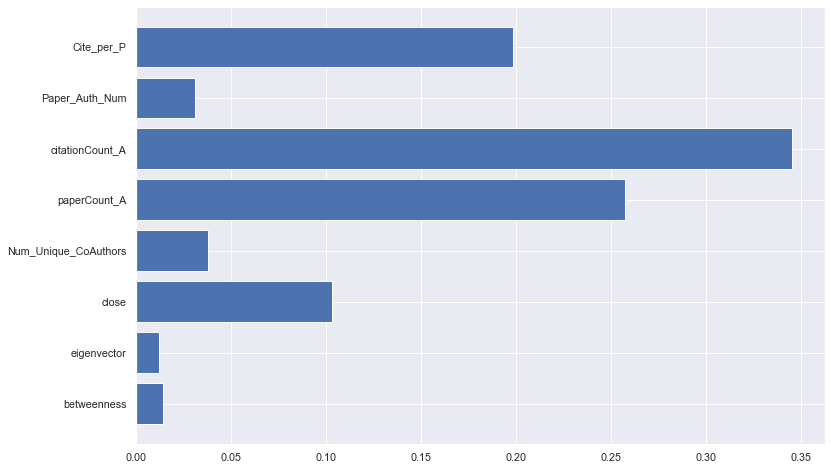





Philosophy
Linear Regression R2 Score: 0.13605020413136493 
Linear Regression MSE: 2606967.1888385196,
Linear Regression RMSE:1614.6105378197306
Random Forest r_square score:  0.8614241135672507
 Decision Tree r_square score:  0.8106749025511517
[0.00956692 0.02647781 0.02585892 0.06233471 0.3162847  0.3965492
 0.01871106 0.14421667]


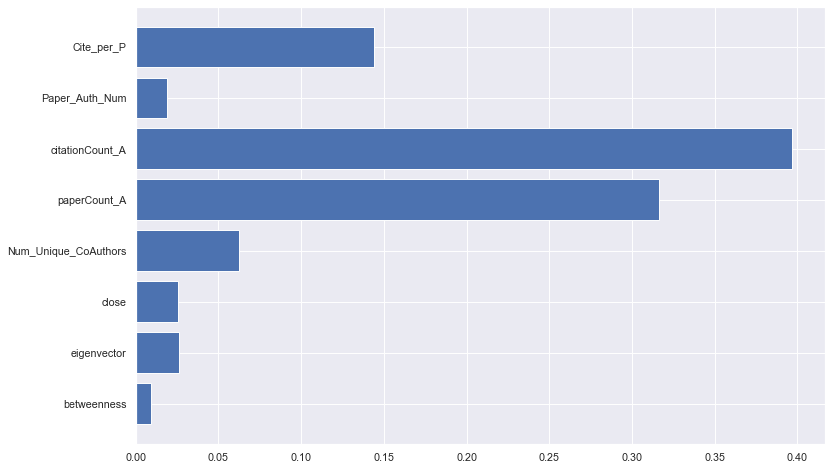





Physics
Linear Regression R2 Score: 0.026117209859804702 
Linear Regression MSE: 3313037.5396119417,
Linear Regression RMSE:1820.175139818128
Random Forest r_square score:  0.9849479274145783
 Decision Tree r_square score:  0.9792265022589607
[0.00843203 0.02250394 0.01295588 0.03158935 0.18886953 0.21974103
 0.03508536 0.48082289]


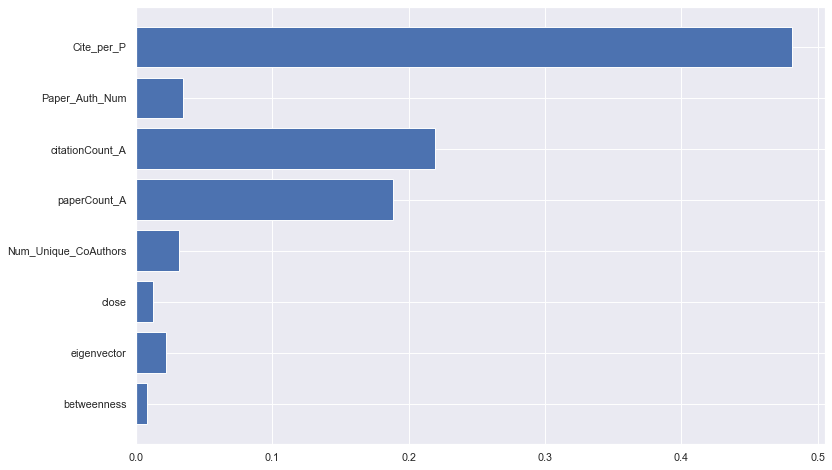





Medicine
Linear Regression R2 Score: 0.07725234077267695 
Linear Regression MSE: 4389788.866135125,
Linear Regression RMSE:2095.1822990220026
Random Forest r_square score:  0.9625112112716362
 Decision Tree r_square score:  0.9561117013876094
[0.01207382 0.01767833 0.05151651 0.04691038 0.32042963 0.21646685
 0.03334904 0.30157544]


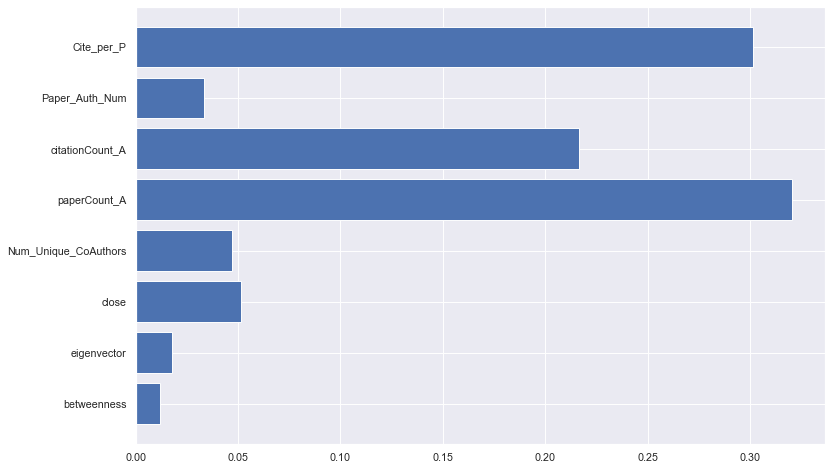





Political science
Linear Regression R2 Score: 0.1418661519170673 
Linear Regression MSE: 3179080.1361110234,
Linear Regression RMSE:1782.9975143311399
Random Forest r_square score:  0.7521930493144375
 Decision Tree r_square score:  0.6574280396006662
[0.         0.02854686 0.01551939 0.03232346 0.21898059 0.46794234
 0.03377421 0.20291315]


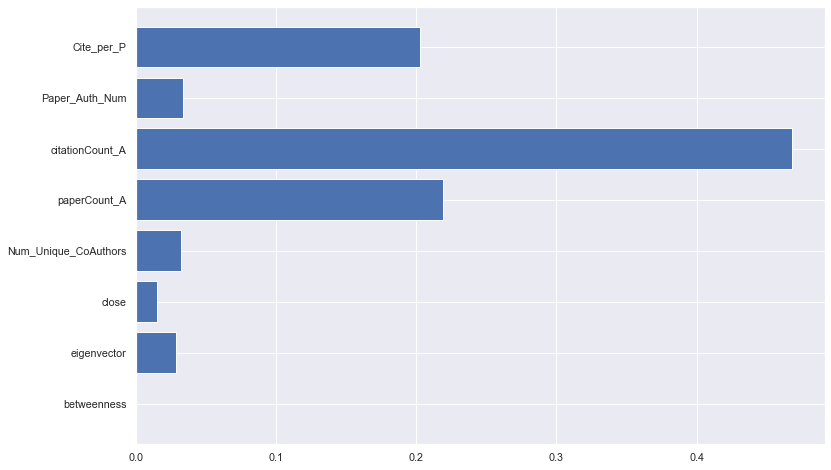





Engineering
Linear Regression R2 Score: 0.126711800022985 
Linear Regression MSE: 2573416.5071700527,
Linear Regression RMSE:1604.1871795928469
Random Forest r_square score:  0.8648119934011756
 Decision Tree r_square score:  0.7816273588644685
[0.00760348 0.07916562 0.0685284  0.03319802 0.25378093 0.37214478
 0.02619479 0.15938399]


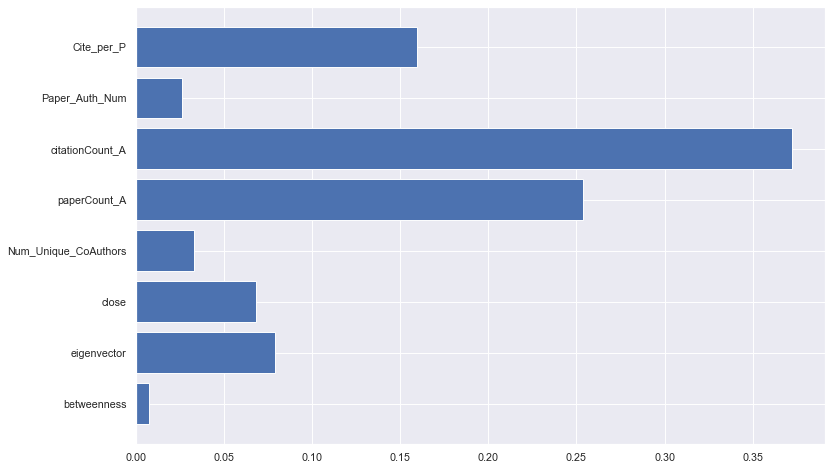





Psychology
Linear Regression R2 Score: 0.13087900980282818 
Linear Regression MSE: 2847923.5836459366,
Linear Regression RMSE:1687.5792081102256
Random Forest r_square score:  0.818451174456519
 Decision Tree r_square score:  0.7532936400811268
[2.83060547e-05 3.31159097e-02 1.37655511e-02 3.06128374e-02
 2.37204617e-01 4.61831935e-01 4.15676628e-02 1.81873180e-01]


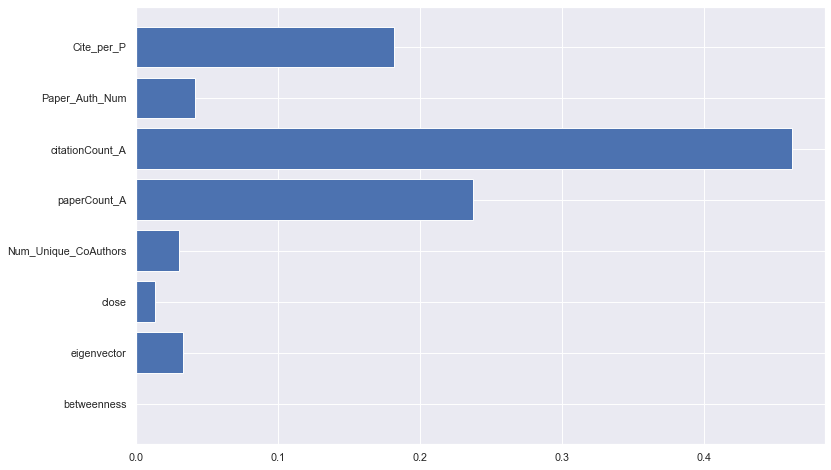

In [57]:
fos_dict = dict()

for x in data_fos.fos_list.unique():
    df0 = data_fos[data_fos.fos_list==x]
    df = df0.drop(['fos_list','Collab_Num'], axis=1)
    print(x)
    three_reg(df,x,['citationCount_A','Cite_per_P', 'eigenvector','close','betweenness','Num_Unique_CoAuthors'])
    print('\n')
    print('\n')
    #fos_dict[x] = rfr.feature_importances_

<ipython-input-58-ce883ce019ac>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=keys,rotation=80);


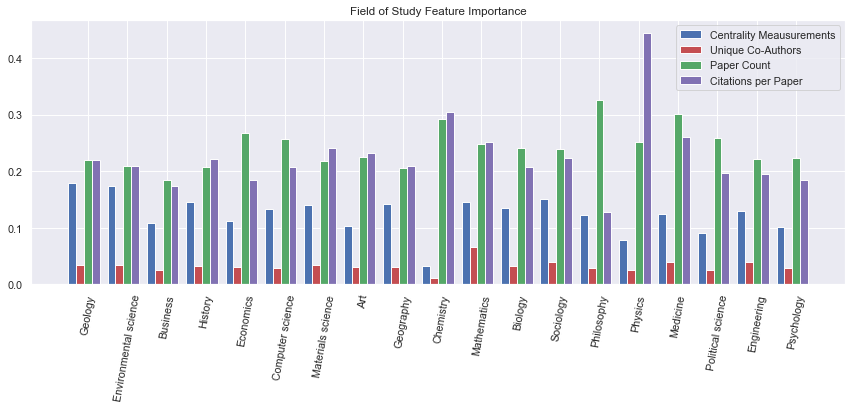

In [58]:
keys = [key for key in fos_dict.keys()]
values = [value[0:11] for value in fos_dict.values()]
#(values)
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(np.arange(len(keys)) - 0.4, [(value[0]+value[1]+value[2]+value[3]) for value in values],
       width=0.2, color='b', align='center', label='Centrality Meausurements')
ax.bar(np.arange(len(keys)) - 0.2, [value[3] for value in values],
       width=0.2, color='r', align='center', label='Unique Co-Authors')
ax.bar(np.arange(len(keys)) + 0.0, [value[4] for value in values],
       width=0.2, color='g', align='center', label='Paper Count')
ax.bar(np.arange(len(keys)) + 0.2, [value[7] for value in values],
       width=0.2, color='m', align='center', label='Citations per Paper')

ax.set_title("Field of Study Feature Importance")
ax.set_xticklabels(labels=keys,rotation=80);
ax.set_xticks(np.arange(len(keys)))

#plt.plot(x, y1, label ='Numbers')
#plt.plot(x, y2, label ='Square of numbers')

# Function add a legend 
#plt.xticks('Betweenness','Collaboration Number','Citations per Paper')
plt.legend()
plt.show()